In [ ]:
!pip install scikit-plot

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [ ]:
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")


    # Genera alcuni dati di esempio per tre classi
    n_classes = 8


    # Binariaza le etichette
    y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Calcola la curva ROC aggregata
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plotta la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='Curva ROC (AUC = {0:0.2f})'
            ''.format(roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linea di riferimento diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi')
    plt.ylabel('Tasso di veri positivi')
    plt.title('Curva ROC per la classificazione multi-classe')
    plt.legend(loc="lower right")
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print("____________________________________")
    print("****** VALORE DI AUC *******")
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()

In [ ]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [ ]:
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()

In [ ]:
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [ ]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dal classificatore
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)
    print("____________________________________________")

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")

    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall,
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")

    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))

    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [ ]:
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print(roc_auc_score(y_test, y_score[:,1]))

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()


    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()


    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")
    plot_lift_curve(y_test, y_score)
    plt.show()

In [ ]:
df_train=pd.read_csv("ravdess_train.csv")
df_test=pd.read_csv("Ravdess_test.csv")

In [ ]:
df_train

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005,1
1,1,5,0,1,1,1,0.013950,-0.063106,-0.76930,0.770118,...,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538,1
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754,1
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845,1
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,-0.063106,-0.74864,-0.713004,...,1.296552,0.333745,-1.106246,-0.612427,-1.198817,0.647428,0.036057,1.054354,-1.526104,18
1824,1,7,1,1,0,0,-0.016770,-0.063106,-0.74864,-0.237333,...,1.376251,0.352433,-0.901054,-0.871550,-1.198817,0.734806,0.036057,-0.389173,-0.504115,18
1825,1,7,1,1,1,0,-0.025751,-0.063106,-0.74864,-0.806583,...,1.421183,1.039254,-1.106898,-0.894085,-0.618677,0.624605,0.036057,-0.130100,-0.454243,18
1826,1,7,1,0,0,0,-0.009914,-0.063106,-0.70732,-1.013416,...,1.305472,-0.074024,-0.732249,-0.424644,-1.198817,0.343780,0.036057,0.072917,-1.058564,18


In [ ]:
df_test

,Unnamed: 0,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,0,1,5,0,1,0,1,0.471300,0.040064,-0.739874,...,0.713432,-0.190379,0.251836,-0.162595,1.952153,1.254304,0.049581,0.652919,-0.493238,19
1,1,1,5,0,1,1,1,0.126584,0.040064,-0.739874,...,0.859202,-0.618751,0.361906,-1.207090,0.699988,0.545470,0.049581,0.350178,-0.551086,19
2,2,1,5,0,0,0,1,-0.591735,0.040064,-0.785476,...,0.964382,-0.268520,0.616067,-0.799392,0.874587,0.940008,0.049581,2.245793,-1.380431,19
3,3,1,5,0,0,1,1,-0.077100,0.040064,-0.762675,...,0.512538,-0.474050,1.146812,-0.431005,1.740569,1.191764,0.049581,-0.361240,0.018907,19
4,4,1,1,0,1,0,1,0.141006,0.040064,-0.762675,...,0.783936,1.144458,-1.285417,0.456053,1.462546,1.232346,0.049581,0.156689,-0.439458,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,0,3,0,0,1,0,0.310354,0.040064,-0.283859,...,-0.782914,-0.112144,-0.762158,0.589910,-1.073992,-0.015243,0.049581,0.230264,-0.995984,24
620,620,0,3,1,1,0,0,-1.001327,0.040064,-0.101452,...,-0.826903,-0.100709,1.306729,-0.616468,-1.103223,-1.388961,0.049581,-0.455872,0.666612,24
621,621,0,3,1,1,1,0,0.445345,0.040064,-0.078652,...,-1.280200,-0.269630,0.169706,-1.416799,-1.064193,-1.818966,0.049581,-0.671121,1.085149,24
622,622,0,3,1,0,0,0,0.623436,0.040064,-0.124253,...,-1.340317,-0.316858,0.328066,-0.312474,-0.724931,-0.636175,0.049581,-0.083593,0.182546,24


In [ ]:
df_test_new=df_test.drop("Unnamed: 0", axis=1, inplace=True)

#creo un oggetto dataframe che contiene i dati del test e droppo la colonna "unnamed:0" (di che colonna si tratta?? non capisco)


In [ ]:
df_test

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.471300,0.040064,-0.739874,0.077772,...,0.713432,-0.190379,0.251836,-0.162595,1.952153,1.254304,0.049581,0.652919,-0.493238,19
1,1,5,0,1,1,1,0.126584,0.040064,-0.739874,0.434766,...,0.859202,-0.618751,0.361906,-1.207090,0.699988,0.545470,0.049581,0.350178,-0.551086,19
2,1,5,0,0,0,1,-0.591735,0.040064,-0.785476,-0.516932,...,0.964382,-0.268520,0.616067,-0.799392,0.874587,0.940008,0.049581,2.245793,-1.380431,19
3,1,5,0,0,1,1,-0.077100,0.040064,-0.762675,0.577221,...,0.512538,-0.474050,1.146812,-0.431005,1.740569,1.191764,0.049581,-0.361240,0.018907,19
4,1,1,0,1,0,1,0.141006,0.040064,-0.762675,-0.314121,...,0.783936,1.144458,-1.285417,0.456053,1.462546,1.232346,0.049581,0.156689,-0.439458,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,3,0,0,1,0,0.310354,0.040064,-0.283859,-0.702275,...,-0.782914,-0.112144,-0.762158,0.589910,-1.073992,-0.015243,0.049581,0.230264,-0.995984,24
620,0,3,1,1,0,0,-1.001327,0.040064,-0.101452,0.589876,...,-0.826903,-0.100709,1.306729,-0.616468,-1.103223,-1.388961,0.049581,-0.455872,0.666612,24
621,0,3,1,1,1,0,0.445345,0.040064,-0.078652,-0.633855,...,-1.280200,-0.269630,0.169706,-1.416799,-1.064193,-1.818966,0.049581,-0.671121,1.085149,24
622,0,3,1,0,0,0,0.623436,0.040064,-0.124253,-0.768437,...,-1.340317,-0.316858,0.328066,-0.312474,-0.724931,-0.636175,0.049581,-0.083593,0.182546,24


In [ ]:
attributes1=[col for col in df_train.columns if col !="Emotion"]
attributes2=[col for col in df_test.columns if col !="Emotion"]
X_train=df_train[attributes1].values
y_train=np.array(df_train["Emotion"])
X_test=df_test[attributes2].values
y_test=np.array(df_test["Emotion"])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

#selziono tutte la colonne del dataframe di addestramento tranne "Vocal_channel_" e le mette in una lista chiamata "attributes1". Lo stesso viene fatto per il dataframe di test, mettendo le colonne selezionate in una lista chiamata "attributes2"
#creo le matrici di feature che contengono tutte le colonne di addestramento e di test
#creo i vettori target y_train e y_test che contengono la variabile vocal_channel_

#il codice non funziona perchè dobbiamo cercare di capire quale variabile o funzione sta restituendo None

((1828, 162), (1828,), (624, 162), (624,))

##PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_pca = pca.transform(X_train)

#utilizziamo la PCA er trasformare le features del dataset di addestramento in un nuovo spazio a due dimensioni
#la prima riga mi indica il numero di componenti principali, quidni pecifica quante nuove features verranno create per la trasformazione, nel nostro caso  il nuovo spazio bidimensionale conterrà solo due componenti principali
#La seconda riga addestra l'oggetto PCA con il dataset di addestramento "X_train". In pratica, l'algoritmo PCA identificherà le componenti principali del dataset di addestramento e le utilizzerà per la trasformazione
#la terza riga trasforma il dataset di addestramento "X_train" nel nuovo spazio a due dimensioni utilizzando la trasformazione PCA addestrata nella riga precedente. Il risultato è la matrice "X_pca", che contiene le nuove features del dataset di addestramento trasformato in un nuovo spazio a due dimensioni

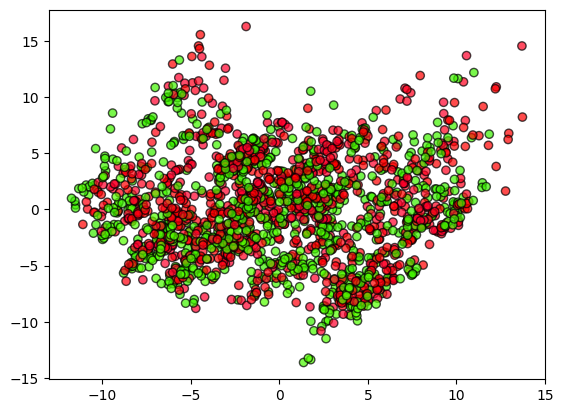

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#creo uno acatter plot in cui la prima colonna della matrice "X_pca" deve essere utilizzata per l'asse x del diagramma, mentre la seconda colonna deve esssere usata per l'asse y
#c=y_train" indica che il colore dei punti sulla scatter plot deve corrispondere alla variabile target "y_train", utilizzando una mappa di colori Prism


##LINEAR SVM


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46474358974358976
F1-score [0.68837209 0.53435115 0.48214286 0.46808511 0.27218935 0.4
 0.2745098  0.45544554]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        96
           1       0.42      0.73      0.53        96
           2       0.42      0.56      0.48        48
           3       0.73      0.34      0.47        96
           4       0.32      0.24      0.27        96
           5       0.40      0.40      0.40        48
           6       0.37      0.22      0.27        96
           7       0.43      0.48      0.46        48

    accuracy                           0.46       624
   macro avg       0.47      0.47      0.45       624
weighted avg       0.48      0.46      0.45       624



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score

# Definizione del parametro grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0],
    'tol': [1e-4, 1e-5, 1e-6],
    'penalty': ['l1', 'l2']
}

# Creazione dell'oggetto LinearSVC
svm = LinearSVC(random_state=42)

# Creazione dell'oggetto GridSearchCV
clf = GridSearchCV(svm, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Esecuzione del training del classificatore
clf.fit(X_train, y_train)

# Stampa dei risultati
print("Best parameters set found on development set:")
print(clf.best_params_)

print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


{'C': 0.1, 'penalty': 'l2', 'tol': 1e-06} linea model hyper parameter
target --> Vocal_channel

APPLICO I RISULTATI OTTENUTI CON GRID SEARCH PER VEDERE COME VARIA LA PERFORMANCE


In [ ]:
#migliora un pochetto, l'accuracy si attesta a 0.4903, poi aggiungo anche l2 come penalty
# e nulla cambia quindi è ininfluente evidentemente
clf = LinearSVC(C=0.1, tol=1e-06, random_state=42, penalty= 'l2')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))



In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

AttributeError: ignored

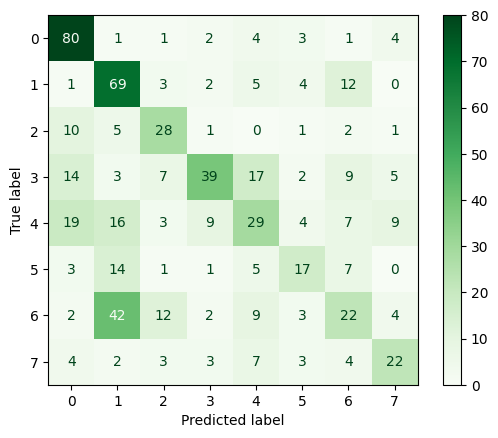

In [ ]:
print_confMatrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

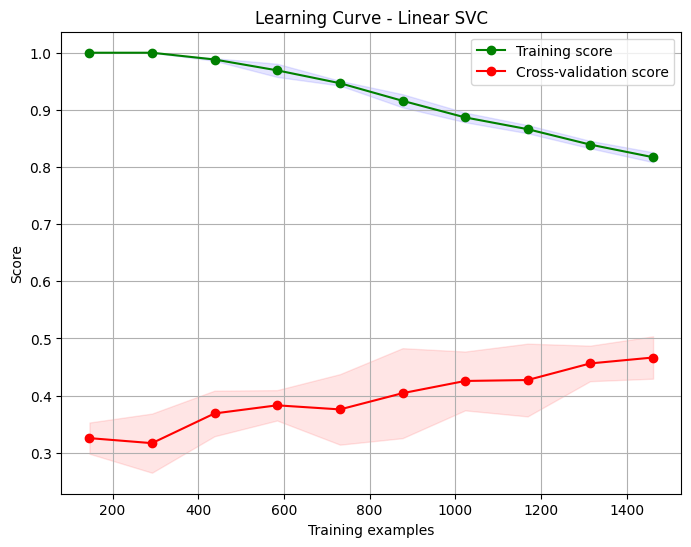

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Linear SVC')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
print_confMatrix(y_test, y_pred)

In [ ]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

#stiamo utilizzando SVM, quindi il Support Vector Machine che altro non è che un
# tipo di modello di apprendimento automatico che cerca di trovare un iperpiano
#che separi i dati di input in classi distinte
#nella prima riga vengono restituiti i valori delle decisioni per ogni campione
#nell'insieme di addestramento.
#nella seconda riga si ricercano i campioni che si trovano sul margine del
#classificatore, ovvero i campioni che hanno un valore di decisione uguale a +/-1.
# Questi campioni costituiscono i vettori di supporto del classificatore
#infine vengono estratti i vettori di supporto dal set di addestramento
#utilizzando gli indici dei campioni trovati in precedenza

In [ ]:
support_vectors_pca = pca.transform(support_vectors)

#eseguiamo una rasformazione dei vettori di supporto dalla loro rappresentazione originale nel set di addestramento all'ambiente delle due componenti principali individuate tramite l'analisi delle componenti principali (PCA) precedentemente applicata ai dati di addestramento

##NON LINEAR SVM

In [ ]:
from sklearn.svm import SVC


In [ ]:
clf1 = SVC(gamma='auto')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

#addestriamo un modello di classificazione SVC (Support Vector Machine) sull'insieme di addestramento X_train con le relative etichette y_train
# eseguiamo poi delle previsioni sul set di test e calcoliamo le metriche

Accuracy 0.3766025641025641
F1-score [0.56647399 0.45106383 0.29268293 0.38596491 0.41134752 0.08
 0.27173913 0.08450704]
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        96
           1       0.38      0.55      0.45        96
           2       0.35      0.25      0.29        48
           3       0.44      0.34      0.39        96
           4       0.31      0.60      0.41        96
           5       1.00      0.04      0.08        48
           6       0.28      0.26      0.27        96
           7       0.13      0.06      0.08        48

    accuracy                           0.38       624
   macro avg       0.44      0.33      0.32       624
weighted avg       0.43      0.38      0.36       624



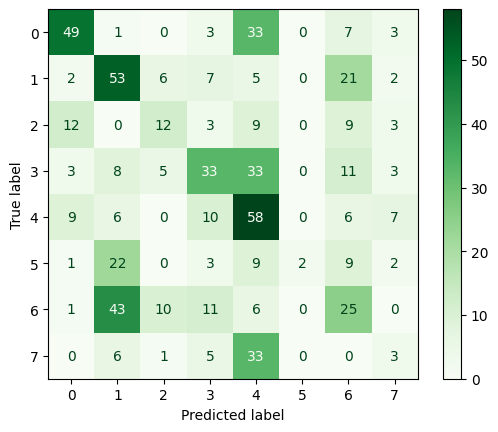

In [ ]:
print_confMatrix(y_test, y_pred)

In [ ]:
#set up plotting area
plt.figure(0).clf()
from sklearn import metrics


fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting
from sklearn import metrics

clf1 = SVC(C=0.001, random_state=42)
clf1.fit(X_train, y_train)
y_train_pred=clf1.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")

print()

clf1 = LinearSVC(C=0.001, random_state=42)
clf1.fit(X_test, y_test)
y_test_pred=clf1.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul test ottenuto equivale a: %", error_test)


Accuracy sul training 0.39442013129102843
L'errore sul train ottenuto equivale a: % 0.6055798687089715
______________________________________

Accuracy sul test 0.7339743589743589
L'errore sul train ottenuto equivale a: % 0.2660256410256411


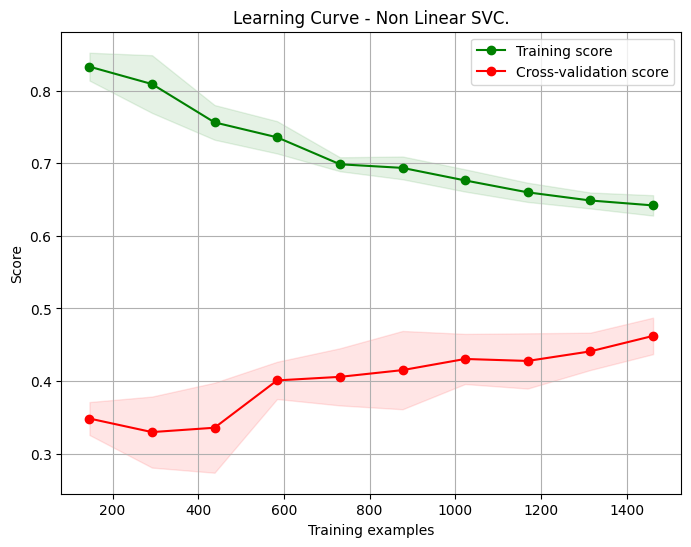

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf1, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Non Linear SVC.')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='g')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

PROVO AD IMPLEMENTARE UNA GRID CHE PREVEDA ANCHE DIVERSI KERNEL

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
%%time


# Definiamo i valori dei parametri per la GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'tol': [1e-4, 1e-5, 1e-6],
    'kernel': ['sigmoid' ,'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Creiamo un oggetto SVC con gamma='auto'
svc = SVC(gamma='auto', probability=True)

# Creiamo l'oggetto GridSearchCV
grid_search = GridSearchCV(svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)



# Addestriamo il modello sul set di addestramento
grid_search.fit(X_train, y_train)

# Eseguiamo le previsioni sul set di test
y_pred = grid_search.predict(X_test)

# Calcoliamo le metriche di valutazione
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)


In [ ]:

clf2 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.48717948717948717
F1-score [0.64035088 0.5907173  0.52173913 0.39716312 0.3880597  0.47058824
 0.33962264 0.41463415]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        96
           1       0.50      0.73      0.59        96
           2       0.45      0.62      0.52        48
           3       0.62      0.29      0.40        96
           4       0.37      0.41      0.39        96
           5       0.54      0.42      0.47        48
           6       0.43      0.28      0.34        96
           7       0.50      0.35      0.41        48

    accuracy                           0.49       624
   macro avg       0.50      0.48      0.47       624
weighted avg       0.49      0.49      0.47       624



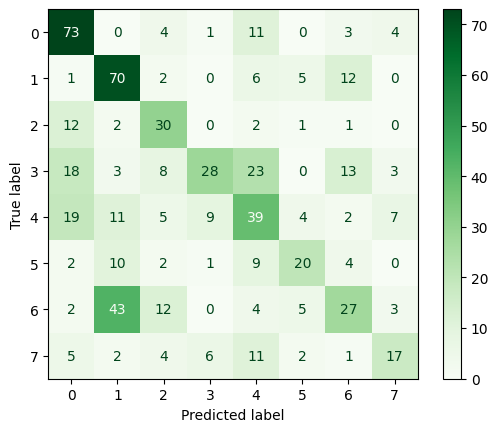

In [ ]:
print_confMatrix(y_test, y_pred)
#print_rocCurve(clf,X_test,y_test)
#print_precrecCurve(clf,X_test,y_test)

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf2 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)
clf2.fit(X_train, y_train)
y_train_pred=clf2.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)

print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")
print()

clf2 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)
clf2.fit(X_test, y_test)
y_test_pred=clf2.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul test ottenuto equivale a: %", error_test)

Accuracy sul training 0.8342450765864332
L'errore sul train ottenuto equivale a: % 0.1657549234135668
______________________________________

Accuracy sul test 0.9743589743589743
L'errore sul test ottenuto equivale a: % 0.02564102564102566


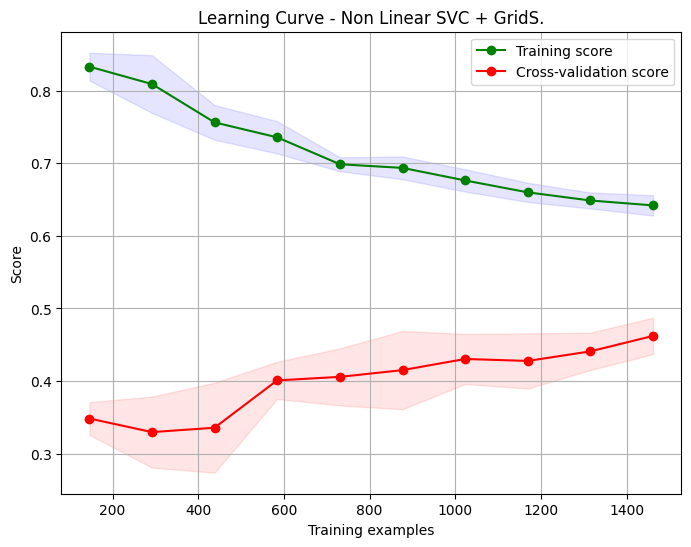

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf2, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Non Linear SVC + GridS.')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

SELECT KBEST


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(1828, 62)

In [ ]:
X_test_sel = sel.transform(X_test)

clf3 = SVC(C=0.1, degree=2, gamma='auto',
           kernel='linear', probability=True)

clf3.fit(X_train_sel, y_train)

y_pred = clf3.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5080128205128205
F1-score [0.66666667 0.53465347 0.47169811 0.48051948 0.43209877 0.54054054
 0.39779006 0.48275862]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        96
           1       0.51      0.56      0.53        96
           2       0.43      0.52      0.47        48
           3       0.64      0.39      0.48        96
           4       0.53      0.36      0.43        96
           5       0.48      0.62      0.54        48
           6       0.42      0.38      0.40        96
           7       0.41      0.58      0.48        48

    accuracy                           0.51       624
   macro avg       0.50      0.52      0.50       624
weighted avg       0.52      0.51      0.50       624



In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf3 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)
clf3.fit(X_train_sel, y_train)
y_train_pred=clf3.predict(X_train_sel)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)

print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")
print()

clf3 = LinearSVC(C=0.001, random_state=42)
clf3.fit(X_test_sel, y_test)
y_test_pred=clf3.predict(X_test_sel)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

Accuracy sul training 0.6849015317286652
L'errore sul train ottenuto equivale a: % 0.3150984682713348
______________________________________

Accuracy sul test 0.6073717948717948
L'errore sul train ottenuto equivale a: % 0.3926282051282052


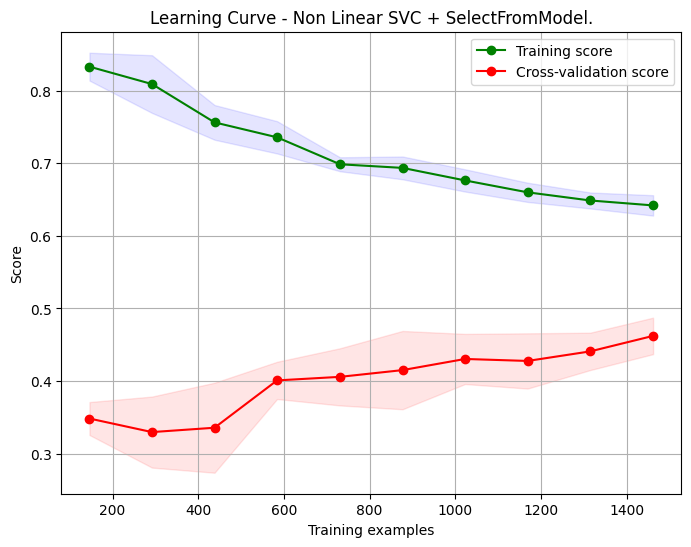

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf3, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Non Linear SVC + SelectFromModel.')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

#PROVO CON UNA TECNICA DI OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({5: 280, 1: 280, 4: 280, 6: 280, 0: 280, 3: 280, 2: 280, 7: 280})


In [ ]:
clf4 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.48717948717948717
F1-score [0.64035088 0.5907173  0.52173913 0.39716312 0.3880597  0.47058824
 0.33962264 0.41463415]
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        96
           1       0.50      0.73      0.59        96
           2       0.45      0.62      0.52        48
           3       0.62      0.29      0.40        96
           4       0.37      0.41      0.39        96
           5       0.54      0.42      0.47        48
           6       0.43      0.28      0.34        96
           7       0.50      0.35      0.41        48

    accuracy                           0.49       624
   macro avg       0.50      0.48      0.47       624
weighted avg       0.49      0.49      0.47       624



In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf4 = SVC(C=0.1, degree=2, gamma='auto', kernel='linear', probability=True)
clf4.fit(X_res, y_train)
y_train_pred=clf4.predict(X_res)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)

print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")
print()

clf4 = LinearSVC(C=0.001, random_state=42)
clf4.fit(X_res, y_test)
y_test_pred=clf4.predict(X_res)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

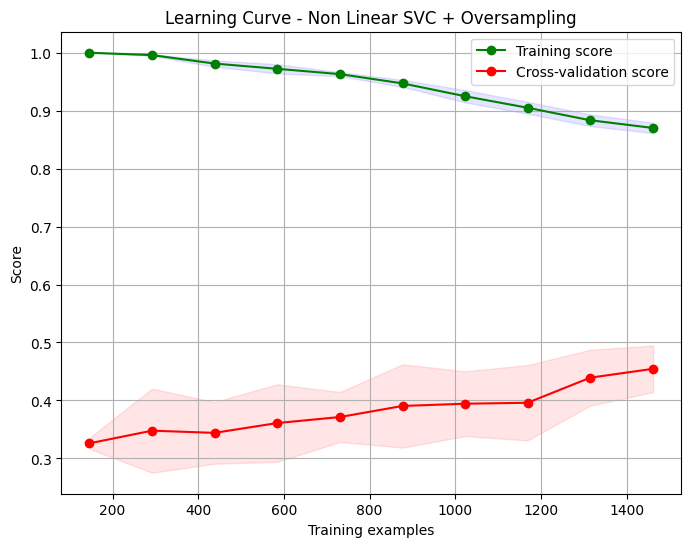

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf4, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Non Linear SVC + Oversampling')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()